<a href="https://colab.research.google.com/github/AnoushkaTripathi/DRDO_Internship/blob/main/Gaussian_data_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Parameters
num_points = 1000
num_peaks = 4
min_peak = 2**1
max_peak = 2**12

# Generate x values (linearly spaced)
x = np.linspace(0, 10, num_points)

# Generate y values (initially zeros)
y = np.zeros(num_points)

# Generate peaks
peak_positions = np.linspace(0, 10, num_peaks + 2)[1:-1]
for peak in peak_positions:
    peak_height = np.random.uniform(min_peak, max_peak)
    y += peak_height * np.exp(-0.5 * ((x - peak) / 0.2)**2)

# Add Gaussian noise
noise_level = np.random.choice([2, 3])  # Choose 2 or 3 levels of noise
y_noisy = y + np.random.normal(0, noise_level, num_points)

# Convert to integers (for hexadecimal conversion) and clip within range
y_int = np.clip(y_noisy, 0, 2**12 - 1).astype(int)

# Convert to hexadecimal format
hex_data = [f'{value:03x}' for value in y_int]  # 3 digits hex (for 12 bits)

# Write to .mem file
with open("output.mem", "w") as mem_file:
    for i, data in enumerate(hex_data):
        mem_file.write(f"@{i:04x} {data}\n")  # Address and data in hexadecimal


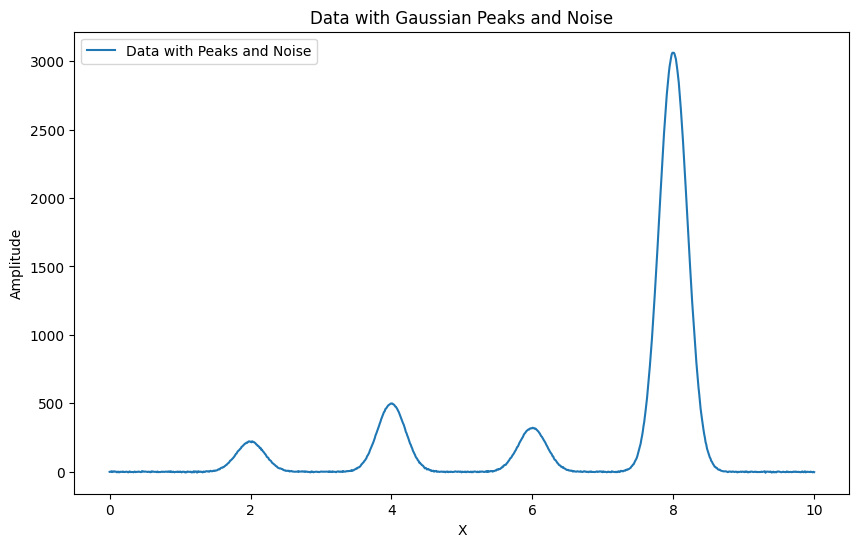

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 1000
num_peaks = 4
min_peak = 2**1
max_peak = 2**12

# Generate x values (linearly spaced)
x = np.linspace(0, 10, num_points)

# Generate y values (initially zeros)
y = np.zeros(num_points)

# Generate peaks
peak_positions = np.linspace(0, 10, num_peaks + 2)[1:-1]  # Avoid peaks at the very edges
for peak in peak_positions:
    peak_height = np.random.uniform(min_peak, max_peak)
    y += peak_height * np.exp(-0.5 * ((x - peak) / 0.2)**2)  # Adding Gaussian-shaped peaks

# Add Gaussian noise
noise_level = np.random.choice([2, 3])  # Choose 2 or 3 levels of noise
y_noisy = y + np.random.normal(0, noise_level, num_points)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y_noisy, label='Data with Peaks and Noise')
plt.title('Data with Gaussian Peaks and Noise')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.legend()
plt.show()






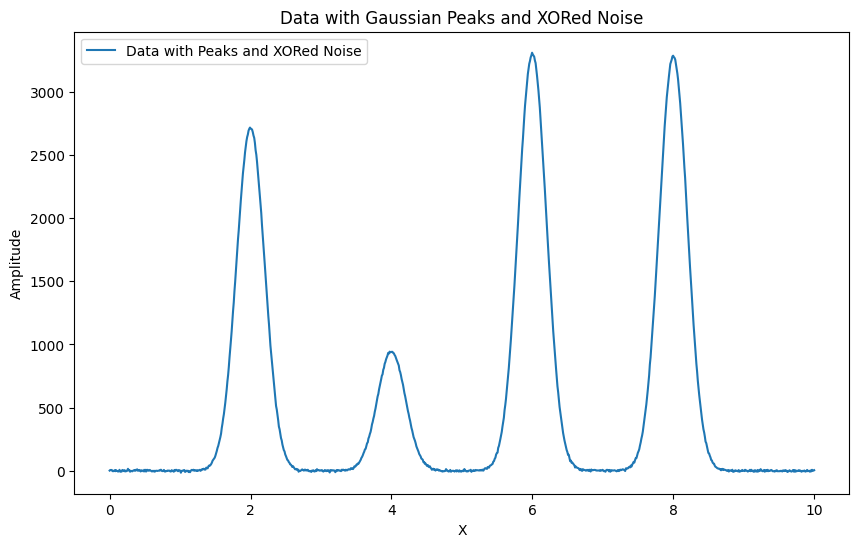

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 1000
num_peaks = 4
min_peak = 2**1
max_peak = 2**12

# Generate x values (linearly spaced)
x = np.linspace(0, 10, num_points)

# Generate y values (initially zeros)
y = np.zeros(num_points)

# Generate peaks
peak_positions = np.linspace(0, 10, num_peaks + 2)[1:-1]  # Avoid peaks at the very edges
for peak in peak_positions:
    peak_height = np.random.uniform(min_peak, max_peak)
    y += peak_height * np.exp(-0.5 * ((x - peak) / 0.2)**2)  # Adding Gaussian-shaped peaks

# Add XORed Gaussian noise
noise_level_1 = np.random.normal(0, 2, num_points)  # Noise level 1 (Gaussian)
noise_level_2 = np.random.normal(0, 3, num_points)  # Noise level 2 (Gaussian)
noise_level_3 = np.random.normal(0, 4, num_points)  # Noise level 3 (Gaussian)

# Convert to integers for bitwise XOR operation
noise_level_1_int = np.round(noise_level_1).astype(int)
noise_level_2_int = np.round(noise_level_2).astype(int)
noise_level_3_int = np.round(noise_level_3).astype(int)

# Perform bitwise XOR
noise_xor = noise_level_1_int ^ noise_level_2_int ^ noise_level_3_int

# Add XORed noise to the peak data
y_noisy = y + noise_xor

# Plot the data with XORed noise
plt.figure(figsize=(10, 6))
plt.plot(x, y_noisy, label='Data with Peaks and XORed Noise')
plt.title('Data with Gaussian Peaks and XORed Noise')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


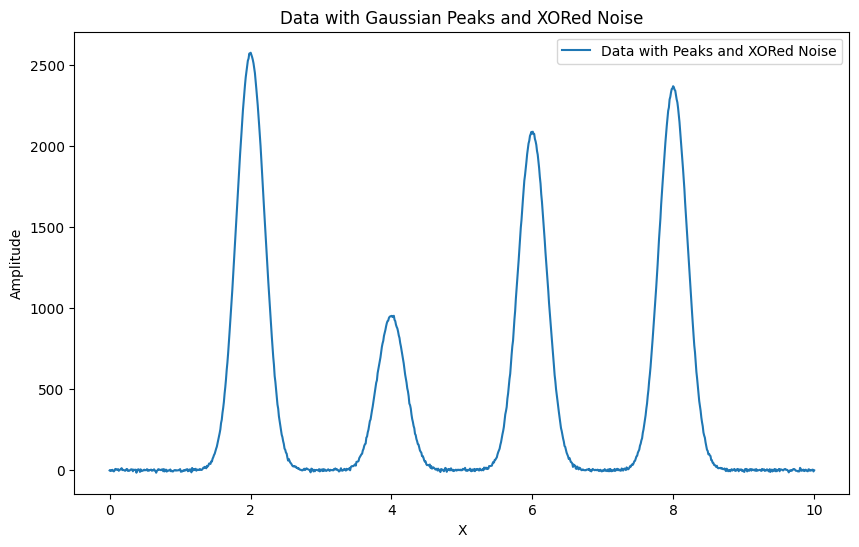

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_points = 1000
num_peaks = 4
min_peak = 2**1
max_peak = 2**12

# Generate x values (linearly spaced)
x = np.linspace(0, 10, num_points)

# Generate y values (initially zeros)
y = np.zeros(num_points)

# Generate peaks
peak_positions = np.linspace(0, 10, num_peaks + 2)[1:-1]  # Avoid peaks at the very edges
for peak in peak_positions:
    peak_height = np.random.uniform(min_peak, max_peak)
    y += peak_height * np.exp(-0.5 * ((x - peak) / 0.2)**2)  # Adding Gaussian-shaped peaks

# Add XORed Gaussian noise
noise_level_1 = np.random.normal(0, 2, num_points)  # Noise level 1 (Gaussian)
noise_level_2 = np.random.normal(0, 3, num_points)  # Noise level 2 (Gaussian)
noise_level_3 = np.random.normal(0, 4, num_points)  # Noise level 3 (Gaussian)

# Convert to integers for bitwise XOR operation
noise_level_1_int = np.round(noise_level_1).astype(int)
noise_level_2_int = np.round(noise_level_2).astype(int)
noise_level_3_int = np.round(noise_level_3).astype(int)

# Perform bitwise XOR
noise_xor = noise_level_1_int ^ noise_level_2_int ^ noise_level_3_int

# Add XORed noise to the peak data
y_noisy = y + noise_xor

# Quantize data to integer values (optional scaling if needed)
y_noisy_int = np.round(y_noisy).astype(int)  # Convert to integer for UART transmission

# Plot the data with XORed noise
plt.figure(figsize=(10, 6))
plt.plot(x, y_noisy, label='Data with Peaks and XORed Noise')
plt.title('Data with Gaussian Peaks and XORed Noise')
plt.xlabel('X')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Save the data to a .mem file for UART transmission
with open('output_data.mem', 'w') as f:
    for value in y_noisy_int:
        f.write(f"{value & 0xFFF:03X}\n")  # Write as 12-bit hex values
